### Understanding Regularization and Dropout

In this tutorial, we'll cover the concepts of regularization and dropout, focusing on how they work and how to implement them effectively.

## Regularization
Regularization is a technique used to reduce overfitting by adding a penalty to the loss function. One common form of regularization is L2 regularization, which adds a penalty proportional to the square of the magnitude of the coefficients. It is also known as weight decay regularization as it aims at reducing the weights or the coefficients of the nodes.

## Dropout
Dropout is a powerful regularization technique that helps prevent overfitting in neural networks. It works by randomly dropping out nodes during the training process, effectively creating a collection of different networks and then averaging their predictions. The idea is simple, there are two theories that are implemented using the dropout regularization technique:
1. The variance of the model is reduced as soon as a few nodes are dropped and the model becomes less complex, tending to become simpler in structure and more generalizing due to the fact that some of the nodes which could probably learn more or overlearn the data are gone.
2. Now that a node may or may not get the inputs it was getting from the previous nodes (since some of them may have been dropped in that forward pass) that node would not relay too heavily on any single input and hence the weights would be more spreadout among all the inputs, preventing any one feature from getting high weightage.
  
Here’s a step-by-step guide to understanding and implementing dropout:

### Step-by-Step Guide to Dropout

1. **Create a Neural Network**: Start with a neural network that you want to regularize using dropout.

2. **Randomly Drop Nodes**:
   - For each layer in the network, a `keep_prob` is defined which tells us the probability that the node would be kept.
   - If a node is dropped, all its incoming and outgoing connections are removed as well.

3. **Train on a Reduced Network**:
   - After randomly dropping some nodes, train the network on the remaining nodes using backpropagation.
   - For each training example, repeat the process of randomly dropping nodes, creating a different "thinned" network for each example. So each example goes through a different set of randomly kept nodes.

4. **Inverted Dropout**:
   - Implement a common dropout technique called inverted dropout. Suppose we consider layer 3 of the model, then in the following steps:
      - Define a vector \( d^3 \) (dropout vector for layer 3), where each element is randomly set to 1 with probability `keep_prob` (e.g., 0.8) and 0 with probability \( 1 - keep_prob \).
      - Multiply the activations \( a^3 \) by \( d^3 \) element-wise to zero out the dropped nodes.

5. **Scale Activations**:
   - To maintain the expected value of the activations, scale \( a^3 \) by dividing by `keep_prob`. This step ensures that the scale of the activations remains consistent even after dropout.

6. **Testing without Dropout**:
   - At test time, no dropout takes place and the inferencing is done on the full model.
   - The scaling step during training ensures that the expected values of the activations remain consistent, so no additional scaling is required at test time.


   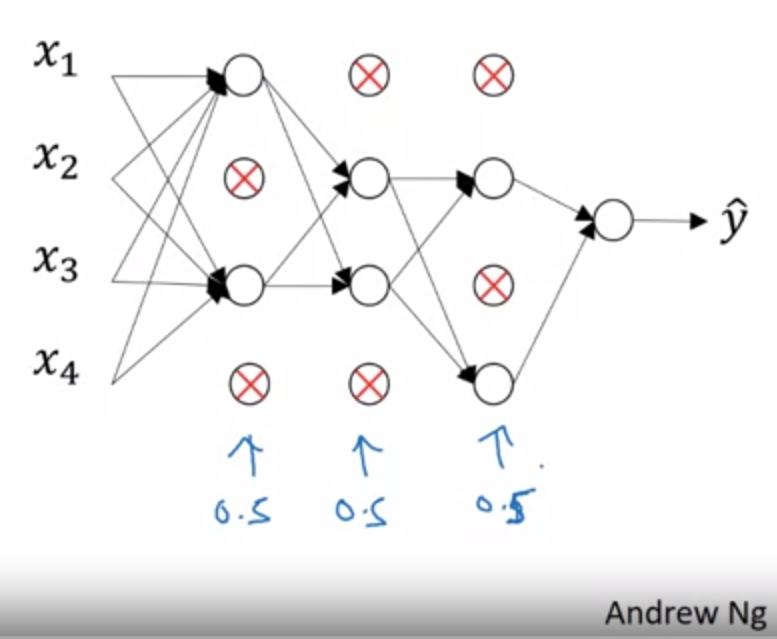

### Example Code for Dropout in Python

```python
import numpy as np

# Example for layer l=3
keep_prob = 0.8
a3 = np.random.rand(50, 1)  # Example activations for layer 3

# Create dropout mask
d3 = np.random.rand(a3.shape[0], a3.shape[1]) < keep_prob

# Apply dropout
a3 = np.multiply(a3, d3)

# Scale activations
a3 /= keep_prob
```

### Summary
- **Regularization** helps prevent overfitting by adding a penalty to the loss function.
- **Dropout** reduces overfitting by randomly dropping nodes during training, effectively creating an ensemble of networks.
- **Inverted Dropout** is a common implementation that ensures consistent activation values by scaling during training.

By using dropout, you can create more robust neural networks that generalize better to new data. This technique is widely used and effective in various machine learning tasks.

**References**
- https://www.coursera.org/learn/deep-neural-network/lecture/eM33A/dropout-regularization